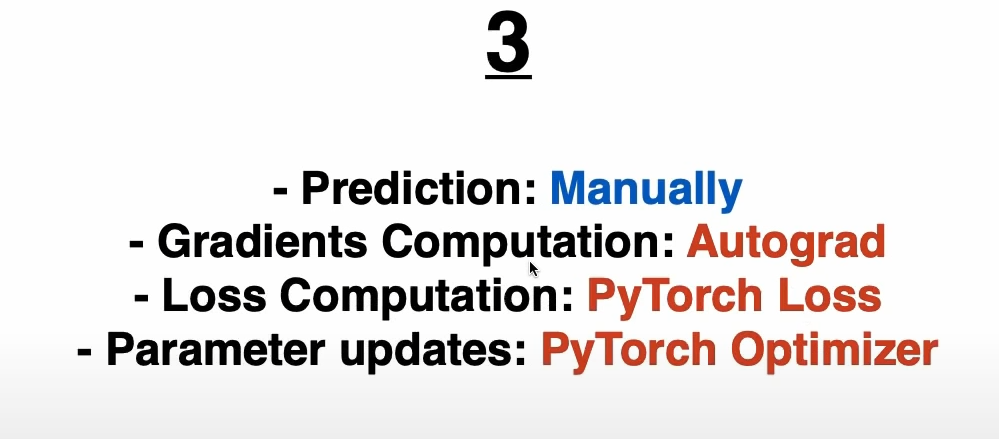

In [9]:
# Pipeline:

# 1) Design Model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training Loop
#     - forward pass  : compute prediction
#     - backward pass : gradients
#     - update weights

In [10]:
import torch
# neural network module
import torch.nn as nn

In [11]:
# f = w*x
# f = 2*x

X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

# we are interested in the gradient of the loss with respect to w
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

In [12]:
# model prediction
def forward(x):
    return w*x

print('Prediction before training : f(20) = {:.3f}'.format(forward(5)))

Prediction before training : f(20) = 0.000


In [13]:
# Training
learning_rate = 0.01
n_iters = 50

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    optimizer.step()
        
    # zero gradients
    optimizer.zero_grad()
    
    if epoch%20 == 0:
        print('Epoch {}: w = {:.3f}, loss = {:.8f}'.format(epoch+1, w, l))
        
print('Prediction after training : f(50) = {:.3f}'.format(forward(5)))

# less accurate, because autograd back-propogation is not as exact as the numeric gradient

Epoch 1: w = 0.300, loss = 30.00000000
Epoch 21: w = 1.934, loss = 0.04506890
Epoch 41: w = 1.997, loss = 0.00006770
Prediction after training : f(50) = 9.997
